##  **1.Create a simple optimization where the function of the optimizer is to simply find a number specified in the shortest number of iterations.**

The idea is to represent numbers (individuals) in the population in binary.

> 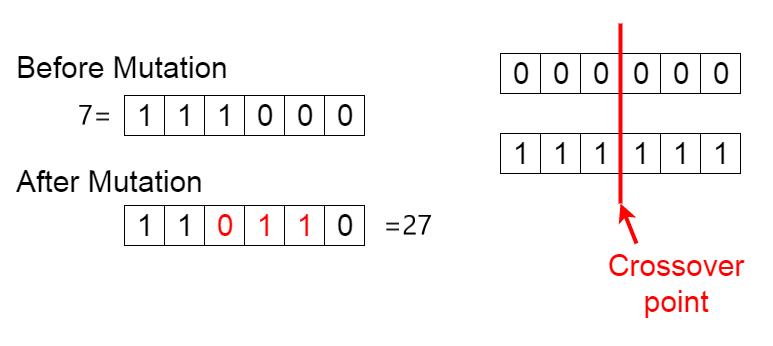



In [ ]:
import functools as ft
import matplotlib.pyplot as plt
from random import randint, random,seed
from operator import add

In [ ]:
def individual(length):
   return [ randint(0,1) for x in range(length) ] 

In [ ]:
def population(count, length):
 return [ individual(length) for x in range(count) ] # returns "count" individuals

In [ ]:
def fitness(individual, target):
  decimal_individual=0
  for i in range(len(individual)):
    decimal_individual+=individual[i]*(2**i)
  return abs(target-decimal_individual)

In [ ]:
def grade(pop, target):
  summed=0
  for x in pop:
    summed += fitness(x, target)
  return summed/len(pop)

In [ ]:
def evolve(pop, target, retain=0.2, random_select=0.05, mutate=0.01):
    graded = [ (fitness(x, target), x) for x in pop]
    graded = [ x[1] for x in sorted(graded)]
    retain_length =  int(len(graded)*retain)
    parents = graded[:retain_length]
    for individual in graded[retain_length:]:
      if random_select > random():
        parents.append(individual)
    for individual in parents:
      if mutate > random():
        pos_to_mutate = randint(0, len(individual)-1)
        individual[pos_to_mutate] = randint(min(individual),max(individual))
    parents_length = len(parents)
    desired_length = len(pop)- parents_length
    children = []
    while len(children) < desired_length :
      male = randint(0, parents_length-1)
      female = randint(0, parents_length-1)
      if male != female :
        male=parents[male]
        female=parents[female]
        half = (len(male)/2)
        child = male[:int(half)] + female[int(half):]
        children.append(child)
    parents.extend(children)
    return(parents)


1356.921
398.809
95.08
25.075
15.929
1.376
0.291
4.645
1.48
1.792
0.198
0.0


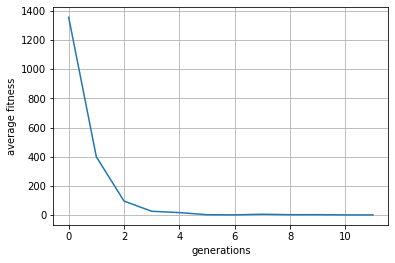

In [ ]:
target = 786
p_count = 1000 #population size
i_len = 12
generations = 3000
p = population(p_count, i_len)
fitness_history = [grade( p, target) , ]
for i in range(generations) :
  p = evolve( p , target )
  fitness_history.append(grade( p , target ) )
  if fitness_history[i+1]==0:
    break

for datum in fitness_history:
    print(datum)

plt.plot(fitness_history)
plt.xlabel("generations")
plt.ylabel("average fitness")
plt.grid()
plt.show()


## **2.How do the number of generations, mutation and crossover parameters affect how quickly a solution is found?**

Number of generations doesn't affect our search, because reproduction
stops when the solution is found. So below we investigate the effect of mutation and crossover rates.

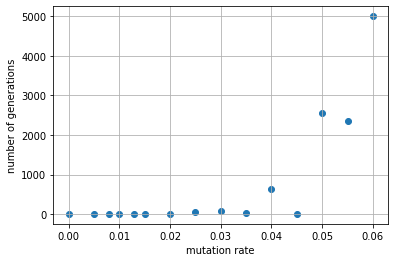

In [ ]:
 seed(42)
 retain=0.2 
 random_select=0.05
 mutate=[0,0.005,0.008,0.01,0.013,0.015,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06]
 target = 661
 p_count = 1000 #population size
 i_len = 12
 generations = 5000
 p = population(p_count, i_len)
 mutation_generation=[0]
 for m in mutate :
   fitness_history = [grade( p, target) , ]
   for i in range(generations):
     p = evolve( p , target,retain,random_select,m)
     fitness_history.append(grade( p , target ) )
     if fitness_history[i+1]==0:
       break
   mutation_generation.append(len(fitness_history))
 plt.scatter(mutate,mutation_generation[1:])
 plt.xlabel("mutation rate")
 plt.ylabel("number of generations")
 plt.grid()
 plt.show()

The minimum of number of generations happens at mutation rate between 0.01 and 0.015. After this minimum point the function seens to have almost an exponetial growth.

> 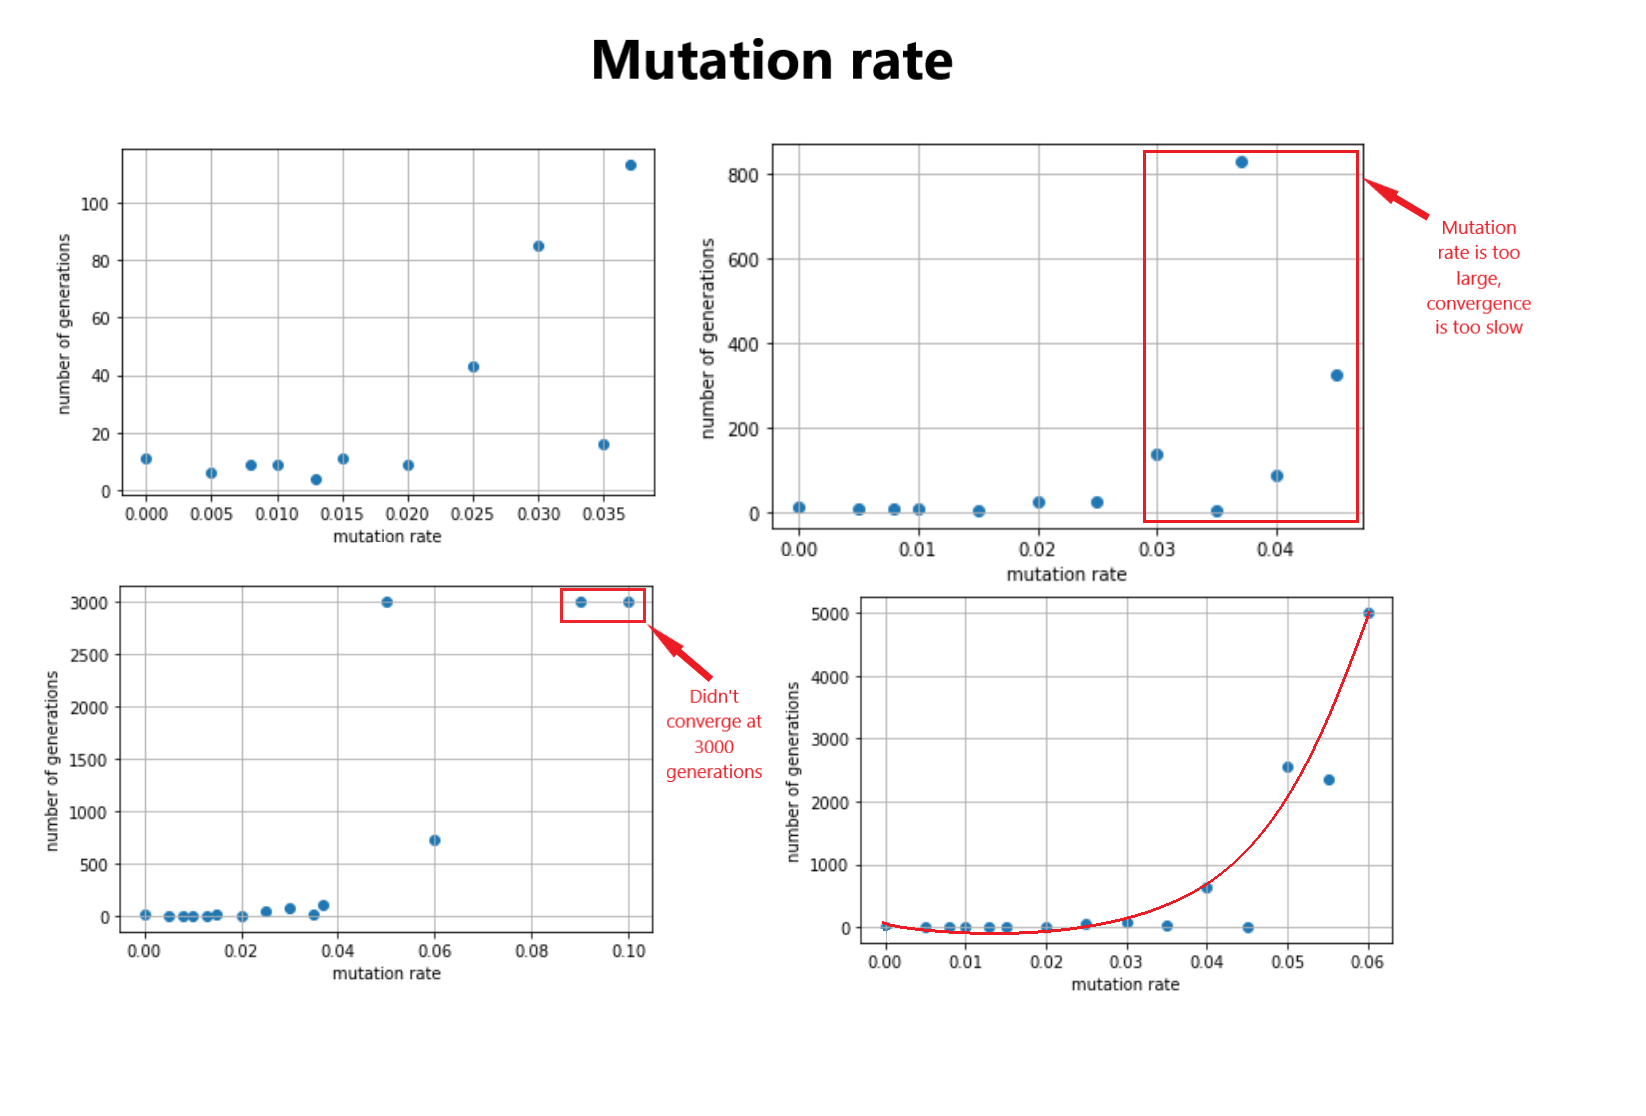





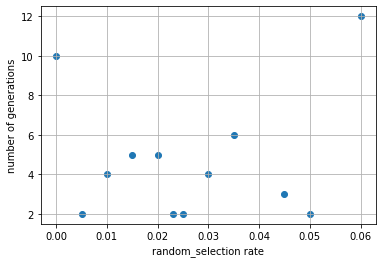

In [ ]:
seed(13)
retain=0.2 
random_select=[0,0.005,0.01,0.015,0.02,0.023,0.025,0.03,0.035,0.045,0.05,0.06]
mutate=0.01
target = 661
p_count = 1000 #population size
i_len = 12
generations = 300
p = population(p_count, i_len)
random_select_generation=[0]
fitness_history = [grade( p, target) , ]
for r in random_select :
  fitness_history = [grade( p, target) , ]
  for i in range(generations):
    p = evolve( p , target,retain,r,mutate)
    fitness_history.append(grade( p , target ) )
    if fitness_history[i+1]==0:
      break
  random_select_generation.append(len(fitness_history))
plt.scatter(random_select,random_select_generation[1:])
plt.xlabel("random_selection rate")
plt.ylabel("number of generations")
plt.grid()
plt.show()

Random selection starts to significantly increase the number of generations after the point 0.06. It is harder to tell the global minimum of the function, based on several simulations it is around 0.005.

> 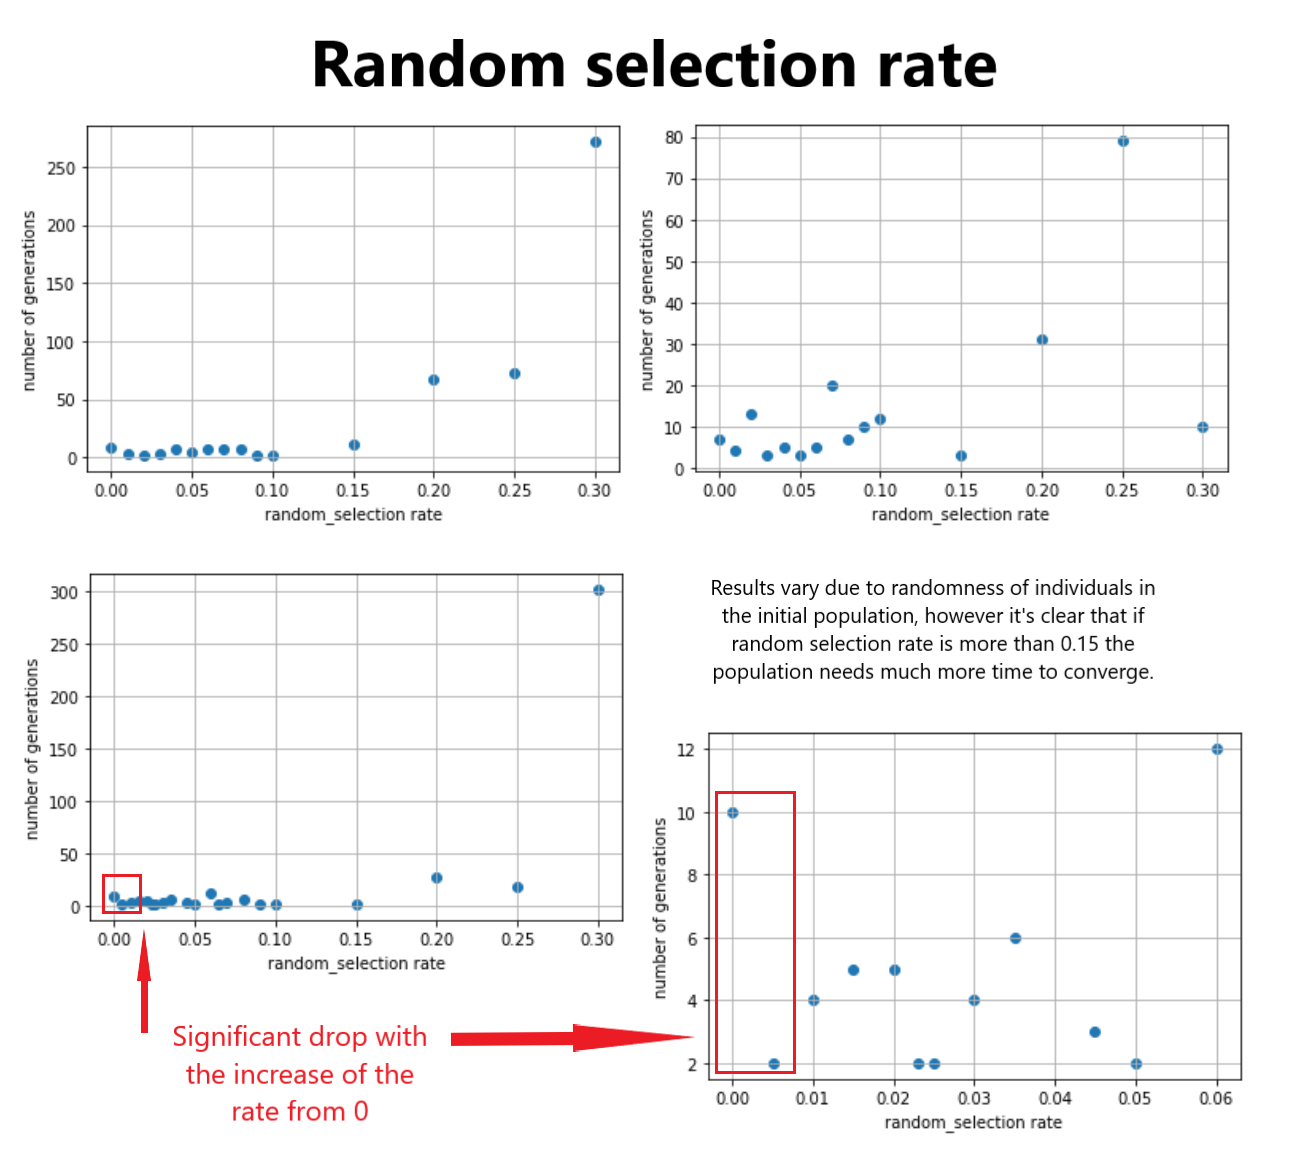



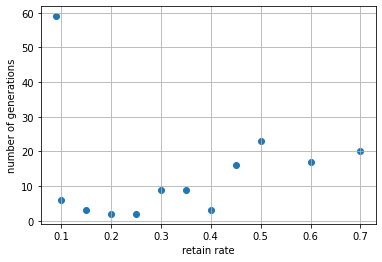

In [ ]:
retain=[0.09,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.6,0.7]
random_select=0.01
mutate=0.01
target = 661
p_count = 1000 #population size
i_len = 12
generations = 3000
p = population(p_count, i_len)
retain_generation=[0]
for r in retain :
  fitness_history = [grade( p, target) , ]
  for i in range(generations):
    p = evolve( p , target,r,random_select,mutate)
    fitness_history.append(grade( p , target ) )
    if fitness_history[i+1]==0:
      break
  retain_generation.append(len(fitness_history))
plt.scatter(retain,retain_generation[1:])
plt.xlabel("retain rate")
plt.ylabel("number of generations")
plt.grid()
plt.show()

The "retain" parameter behaves similarely to mutation, the function minimum is at retain=0.2, with 3 generations required for convergence of the population.



# **3. How to stop the algorithm when a suitable solution had been found to avoid excessive computation time?**

Simple "if...break" control:



```
for r in retain :
  fitness_history = [grade( p, target) , ]
  for i in range(generations):
    p = evolve( p , target,r,random_select,mutate)
    fitness_history.append(grade( p , target ) )
    if fitness_history[i+1]==0:
      break # a suitable solution had been found
```



